In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [10]:
fg_df = pd.read_csv('/content/fear_greed_index (1).csv')
td_df = pd.read_csv('/content/historical_data.csv')


In [11]:
print(fg_df.isnull().sum())
print(td_df.isnull().sum())

timestamp         0
value             0
classification    0
date              0
dtype: int64
/content/historical_data.csv    0
Coin                            0
Execution Price                 0
Size Tokens                     0
Size USD                        0
Side                            0
Timestamp IST                   0
Start Position                  0
Direction                       0
Closed PnL                      0
Transaction Hash                0
Order ID                        0
Crossed                         0
Fee                             0
Trade ID                        0
Timestamp                       0
dtype: int64


In [13]:
td_df= td_df.drop(['Timestamp'], axis=1)

In [14]:
fg_df['date'] = pd.to_datetime(fg_df['date'], format='%d-%m-%Y')
td_df['time'] = pd.to_datetime(td_df['Timestamp IST'], format='%d-%m-%Y %H:%M')

In [15]:
merged_df = pd.merge(td_df, fg_df[['date','classification','value']], left_on=td_df['time'].dt.date, right_on=fg_df['date'].dt.date, how='left')
merged_df = merged_df.drop(columns=['key_0'])

In [16]:
print(merged_df.columns)

Index(['/content/historical_data.csv', 'Coin', 'Execution Price',
       'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position',
       'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed',
       'Fee', 'Trade ID', 'time', 'date', 'classification', 'value'],
      dtype='object')


In [17]:
avg_pnl_by_sentiment = merged_df.groupby('classification')['Closed PnL'].mean()

In [18]:
merged_df['Trade Value'] = merged_df['Size USD'] * merged_df['Execution Price']

avg_size_by_sentiment = merged_df.groupby('classification')['Size USD'].mean()
print(avg_size_by_sentiment)

classification
Extreme Fear     5349.731843
Extreme Greed    3112.251565
Fear             7816.109931
Greed            5736.884375
Neutral          4782.732661
Name: Size USD, dtype: float64


In [19]:
trade_count_by_sentiment = merged_df['classification'].value_counts()
print(trade_count_by_sentiment)


classification
Fear             61837
Greed            50303
Extreme Greed    39992
Neutral          37686
Extreme Fear     21400
Name: count, dtype: int64


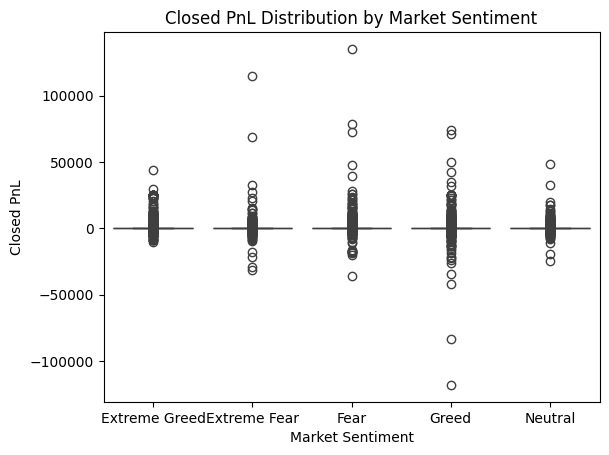

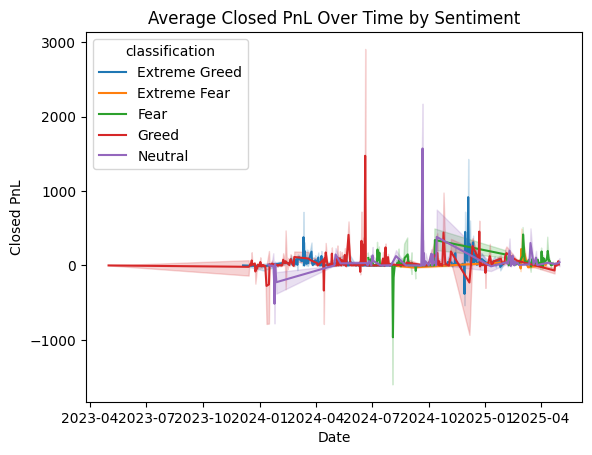

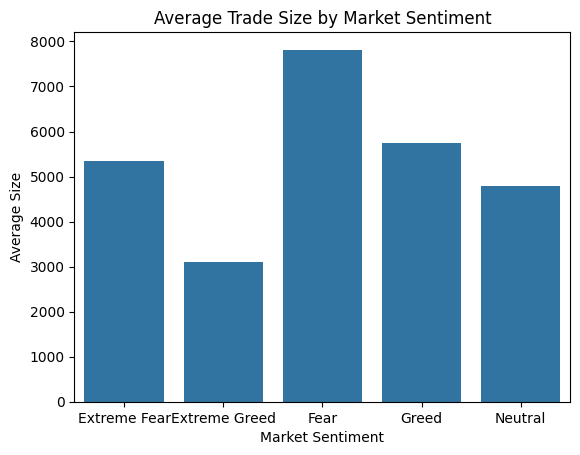

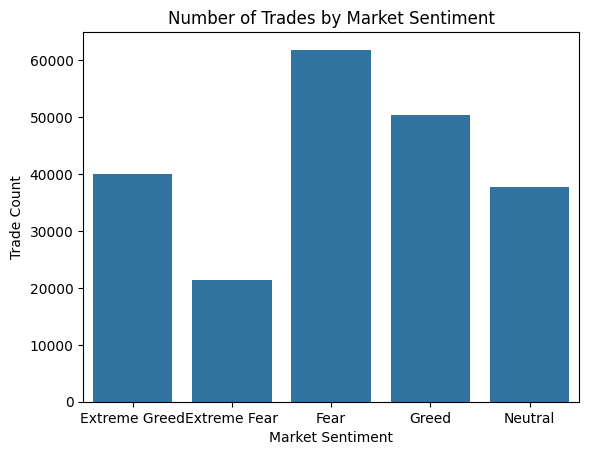

In [23]:
import os
os.makedirs('outputs', exist_ok=True)

plt.figure()
sns.boxplot(x='classification', y='Closed PnL', data=merged_df)
plt.title('Closed PnL Distribution by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Closed PnL')
plt.savefig('outputs/boxplot_closed_pnl.png', dpi=300, bbox_inches='tight')
plt.show()

plt.figure()
sns.lineplot(x='date', y='Closed PnL', hue='classification', data=merged_df)
plt.title('Average Closed PnL Over Time by Sentiment')
plt.xlabel('Date')
plt.ylabel('Closed PnL')
plt.savefig('outputs/line_closed_pnl_time.png', dpi=300, bbox_inches='tight')
plt.show()

avg_size = merged_df.groupby('classification')['Size USD'].mean().reset_index()
plt.figure()
sns.barplot(x='classification', y='Size USD', data=avg_size)
plt.title('Average Trade Size by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Average Size')
plt.savefig('outputs/barplot_trade_size.png', dpi=300, bbox_inches='tight')
plt.show()

plt.figure()
sns.countplot(x='classification', data=merged_df)
plt.title('Number of Trades by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Trade Count')
plt.savefig('outputs/countplot_trades.png', dpi=300, bbox_inches='tight')
plt.show()
